In [ ]:
import torch
import torch.nn as nn
import os
import sys
sys.path.append('/workspace/wxd/SVD/src')
from transformers import CLIPTextModel, CLIPTokenizer, CLIPModel, CLIPImageProcessor
from diffusers import StableDiffusionPipeline, AutoencoderKL, DDIMScheduler, UNet2DConditionModel

In [ ]:
# prepare components
device = 'cuda:0'
text_encoder = CLIPTextModel.from_pretrained(
    '/mnt/storage/user/wangxiaodong/DWM_work_dir/lidar_maskgit_debug/smodels/image-ep100', subfolder="text_encoder"
)
vae = AutoencoderKL.from_pretrained(
    '/mnt/storage/user/wangxiaodong/DWM_work_dir/lidar_maskgit_debug/smodels/image-ep100', subfolder="vae"
)
clip_model = CLIPModel.from_pretrained(
    "/mnt/storage/user/wangxiaodong/DWM_work_dir/lidar_maskgit_debug/smodels/clip-vit-large-patch14", torch_dtype=torch.float16)

unet = UNet2DConditionModel.from_pretrained(
    "/mnt/storage/user/wangxiaodong/DWM_work_dir/lidar_maskgit_debug/smodels/image-allframes-ep100-checkpoint-20000/unet", torch_dtype=torch.float16)

text_encoder.eval()
vae.eval()
clip_model.eval()
text_encoder.to(device)
vae.to(device)
clip_model.to(device)

tokenizer = CLIPTokenizer.from_pretrained('/mnt/storage/user/wangxiaodong/DWM_work_dir/lidar_maskgit_debug/smodels/image-ep100', subfolder="tokenizer")
scheduler = DDIMScheduler.from_pretrained('/mnt/storage/user/wangxiaodong/DWM_work_dir/lidar_maskgit_debug/smodels/image-ep100', subfolder="scheduler")
feature_extractor = CLIPImageProcessor.from_pretrained('/mnt/storage/user/wangxiaodong/DWM_work_dir/lidar_maskgit_debug/smodels/image-ep100', subfolder="feature_extractor")


In [6]:
# prepare pipeline
pipeline = StableDiffusionPipeline(
            text_encoder=text_encoder,
            vae=vae,
            unet=unet,
            scheduler=scheduler,
            tokenizer=tokenizer,
            feature_extractor=feature_extractor,
            safety_checker=None
    )
pipeline = pipeline.to(device).to(torch.float16)

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/50 [00:00<?, ?it/s]

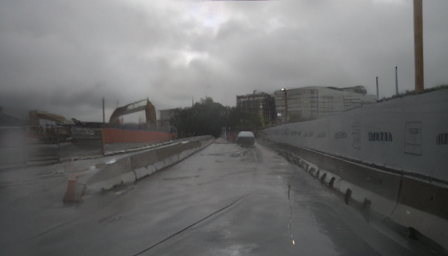

In [8]:
image = pipeline(prompt="There are two lanes on the highway, with cars on the left and empty on the right",height=256, width=448).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

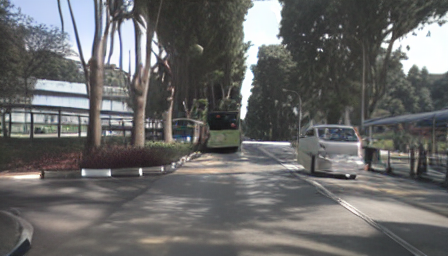

In [9]:
image = pipeline(prompt="a bus driving down a street next to trees.",height=256, width=448).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

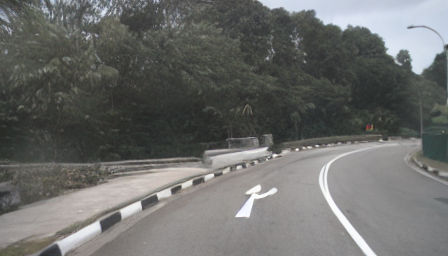

In [11]:
image = pipeline(prompt="There's a left arrow at one of the junctions",height=256, width=448).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

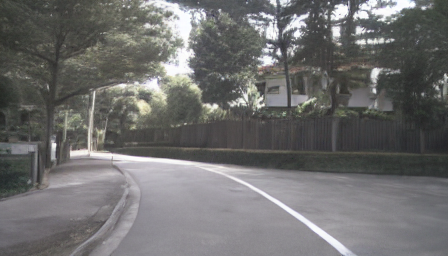

In [14]:
image = pipeline(prompt="a road with a house in the background",height=256, width=448).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

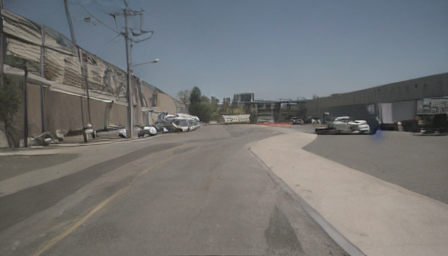

In [25]:
image = pipeline(prompt="a street with a street sign and a building in the background.",height=256, width=448).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

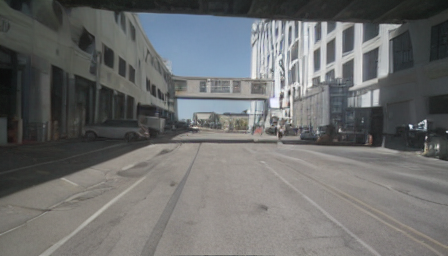

In [26]:
image = pipeline(prompt="a view of the street from the street.",height=256, width=448).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

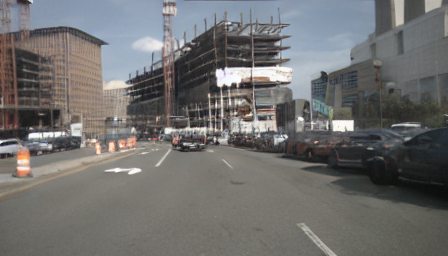

In [20]:
image = pipeline(prompt="a street with cars parked on it and a building under construction.",height=256, width=448).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

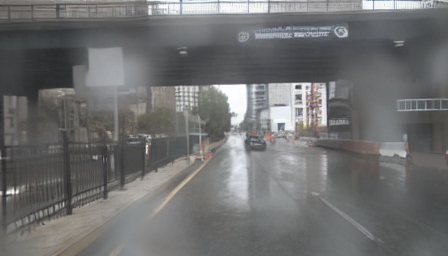

In [19]:
image = pipeline(prompt="a car driving down a street under a bridge.",height=256, width=448).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

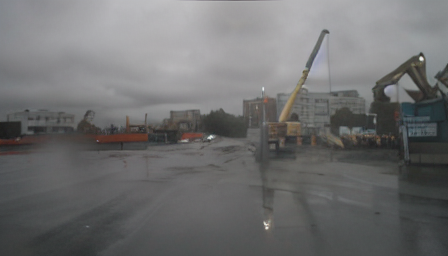

In [18]:
image = pipeline(prompt="a crane is on the side of a road.",height=256, width=448).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

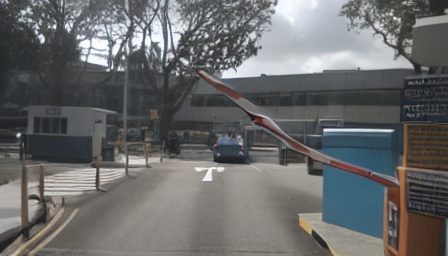

In [16]:
image = pipeline(prompt="a car is stopped at a gate in front of a building",height=256, width=448).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

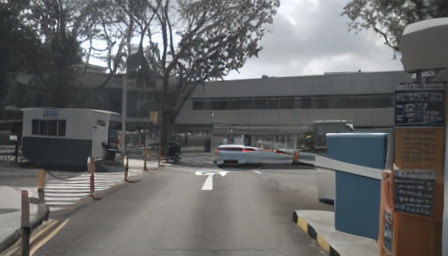

In [17]:
image = pipeline(prompt="a white car is stopped at a gate in front of a building",height=256, width=448).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

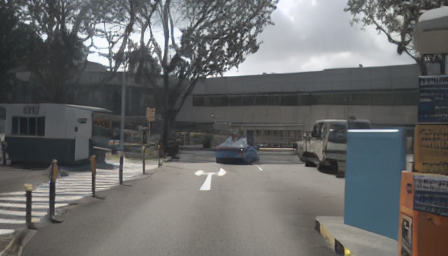

In [15]:
image = pipeline(prompt="a car is driving through a parking lot.", height=256, width=448).images[0]
image